### Task
В данном задании необходимо научить агента побеждать в игре LunarLander при помощи метода DQN или одной из его модификаций.

К заданию нужно приложить код обучения агента (не забудьте зафиксировать seed!), готовый (уже обученный) агент должен быть описан в классе Agent в файле agent.py.

<a href='https://goodboychan.github.io/python/reinforcement_learning/pytorch/udacity/2021/05/07/DQN-LunarLander.html'>Хорошая статья</a>

In [1]:
import gym
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import base64, io

import numpy as np
from collections import deque, namedtuple

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display 
import glob

In [2]:
print(f'gym version: {gym.__version__}')

gym version: 0.26.2


In [3]:
import train as t
import agent as a

In [4]:
%%time
rewards = t.main()

Step: 5000, Reward mean: -470.0466620692711, Reward std: 73.49732637163056
Step: 10000, Reward mean: -365.7242947075466, Reward std: 228.36167799615876
Step: 15000, Reward mean: -258.99905243514024, Reward std: 46.50012984446589
Step: 20000, Reward mean: -221.1275757545458, Reward std: 67.00083542816829
Step: 25000, Reward mean: -293.26792201455385, Reward std: 131.39234310947404
Step: 30000, Reward mean: -167.3142483418534, Reward std: 77.04817693693529
Step: 35000, Reward mean: -237.51612476693526, Reward std: 134.93207612574065
Step: 40000, Reward mean: -115.49831252314114, Reward std: 31.884351491369618
Step: 45000, Reward mean: -106.63933658020119, Reward std: 3.2892655885838855
Step: 50000, Reward mean: 63.65065593892139, Reward std: 136.12628356121323
Step: 55000, Reward mean: -82.510365747197, Reward std: 37.177903863363184
Step: 60000, Reward mean: -32.79647688271388, Reward std: 58.10470838490051
Step: 65000, Reward mean: -59.70660531283338, Reward std: 67.47880199618187
Step

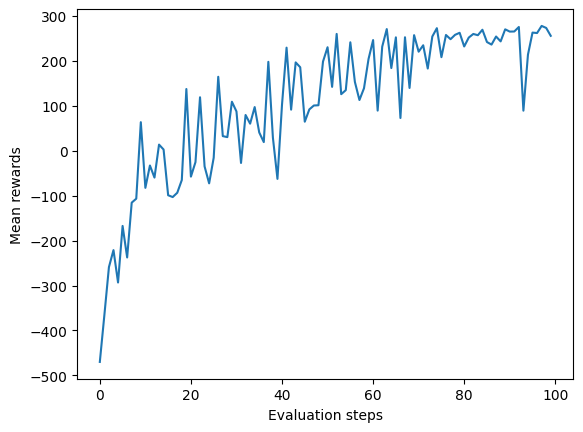

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards)), rewards)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()

In [6]:
def show_video(env_name, tag='best'):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'video/{env_name}_{tag}.mp4'
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")
        
def show_video_of_model(agent, env_name, tag='best'):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path=f"video/{env_name}_{tag}.mp4")
    agent.model.load_state_dict(torch.load(f'checkpoint_{tag}.pth'))
    state = env.reset()[0]
    done = False
    while not done:
        frame = env.render()
        vid.capture_frame()
        action = agent.act(state)

        state, reward, done, _, _ = env.step(action)        
    env.close()

In [7]:
agent = a.Agent()
show_video_of_model(agent, 'LunarLander-v2','first')

Moviepy - Building video video/LunarLander-v2_first.mp4.
Moviepy - Writing video video/LunarLander-v2_first.mp4



Moviepy - Done !
Moviepy - video ready video/LunarLander-v2_first.mp4


In [8]:
show_video('LunarLander-v2','first')

In [9]:
agent = a.Agent()
show_video_of_model(agent, 'LunarLander-v2','best')

Moviepy - Building video video/LunarLander-v2_best.mp4.
Moviepy - Writing video video/LunarLander-v2_best.mp4



Moviepy - Done !
Moviepy - video ready video/LunarLander-v2_best.mp4


In [10]:
show_video('LunarLander-v2','best')

In [11]:
def evaluate_policy(agent, episodes=5):
    env = gym.make("LunarLander-v2")
    returns = []
    agent.model.eval()
    for j in range(episodes):
        done = False
        state = env.reset()[0]
        total_reward = 0.
        
        tries = 0
        while not done and tries < 1000:
            tries += 1
            state, reward, done, _, _ = env.step(agent.act(state))
            total_reward += reward
        returns.append(total_reward)
    agent.model.train()
    return returns

In [12]:
agent = a.Agent()
returns_check = evaluate_policy(agent, episodes=50)

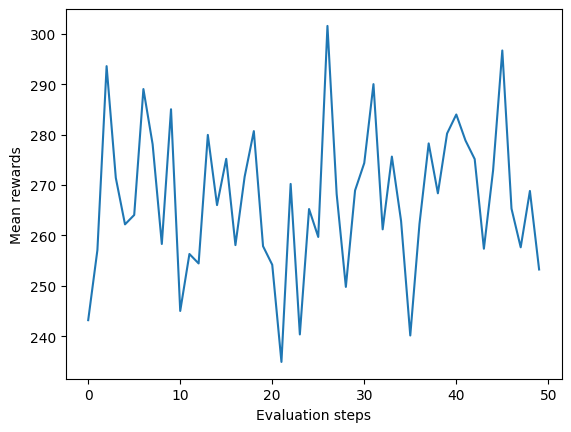

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(returns_check)), returns_check)
plt.ylabel('Mean rewards')
plt.xlabel('Evaluation steps')
plt.show()